# **Lab 2: Brain Tumor MRI Feature Extraction**

- Reece Iriye: 48255107
- Eileen Garcia: 48241821
- Trevor Dohm: 48376059

## **0: Imports**

In [1]:
# Import Statements

# Data Manipulation
import numpy as np
import pandas as pd
import glob
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Manipulation
from PIL import Image, ImageEnhance
import cv2

# Machine Learning
import torchvision.models as models

# Warnings
from typing import List, Dict, Union
import warnings
warnings.filterwarnings('ignore')

## **1: Business & Data Understanding**

## **2: Data Preparation**

In [2]:
# Load Train / Test Data
train_data_mri: str = 'Dataset/Training/'
test_data_mri: str = 'Dataset/Testing/'
IMG_SIZE: int = 256

# Label Encoding
labels: List[str] = ['glioma', 'meningioma', 'notumor', 'pituitary']
label_indexes: Dict[str, int] = {
    label: i 
    for i, label in enumerate(labels)
}

# Empty Lists For Data
train_paths: List[np.ndarray] = []  # List of numpy arrays
train_labels: List[int] = []  # List of integers (encoded labels)
test_paths: List[np.ndarray] = []
test_labels: List[int] = []

# Load Training Data
for label in labels:
    for img_file in glob.glob(train_data_mri + f'/{label}/*.jpg'):
        img: np.ndarray = cv2.imread(img_file, 0)  # This loads in grayscale. Remove ',0' for color.
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize if necessary
        img = img.astype(np.float32) / 255.0  # Normalize pixel values
        train_paths.append(img)
        train_labels.append(label_indexes[label])

# Load Testing Data
for label in labels:
    for img_file in glob.glob(test_data_mri + f'/{label}/*.jpg'):
        img: np.ndarray = cv2.imread(img_file, 0)  # This loads in grayscale. Remove ',0' for color.
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize if necessary
        img = img.astype(np.float32) / 255.0  # Normalize pixel values
        test_paths.append(img)
        test_labels.append(label_indexes[label])  

# Converting Lists To Numpy Arrays
train_paths = np.array(train_paths)
train_labels: np.ndarray = np.array(train_labels)
test_paths: np.ndarray = np.array(test_paths)
test_labels: np.ndarray = np.array(test_labels)

# Resize Data (Linearize Images -> 1D Image Features Table, Row = Image)
train_paths = train_paths.reshape(train_paths.shape[0], -1)
test_paths = test_paths.reshape(test_paths.shape[0], -1)

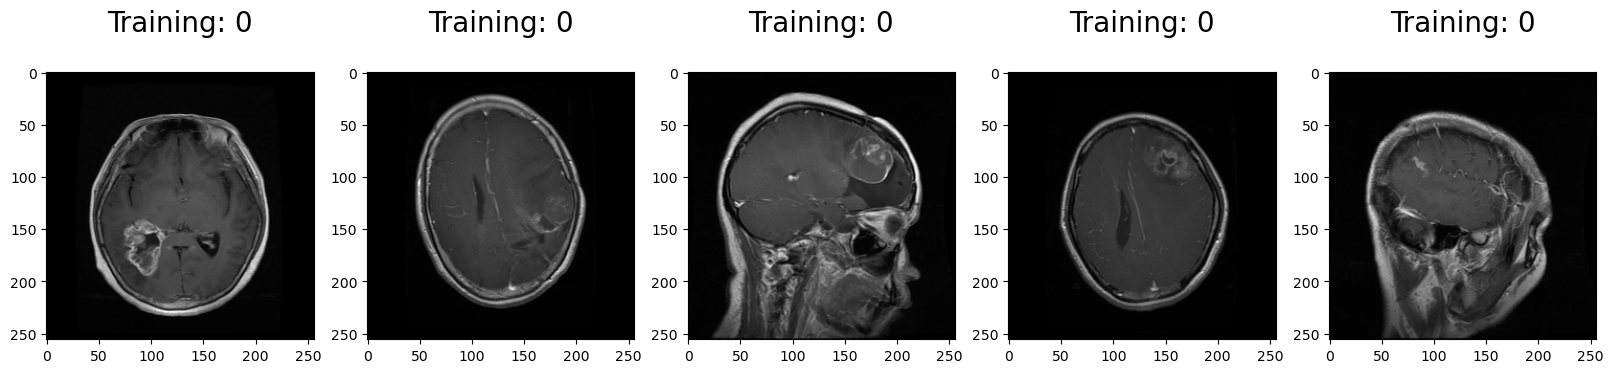

In [4]:
# Display Some Images From trainPaths
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_paths[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (IMG_SIZE, IMG_SIZE)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

We can see here already that our dataset contains images that come from multiple angles. The first, second, and third images clearly show images taken from above, meanwhile the image in the middle has a person facing rightwards, and the image on the right contains a less clear image of a person also looking to the right. 

## **3: Data Reduction**

### **3.1: Dimensionality Reduction with Principal Component Analysis**

### **3.2: Dimensionality with Randomized Principal Component Analysis**

### **3.3: Compare PCA and Randomized PCA**

### **3.4: Feature Extraction using ResNet**

For feature extraction, we decided to use a PyTorch implementation of the <a href="https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-resnet">Residual Network (ResNet)</a> architecture. We chose 

In [5]:
resnet50: models.ResNet = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/reece/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 36.8MB/s]


In [6]:
resnet50.

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### **3.5: ResNET Performance for Prediction Task**

## **4: Exceptional Work**

In [3]:
# # Load Train / Test Data
# trainDataMRI = 'Dataset/Training/'
# testDataMRI = 'Dataset/Testing/'

# # Initialize Training Paths, Labels
# train_paths = []
# train_labels = []

# training_dir = os.listdir(training)
# testing_dir = os.listdir(testing)
# 	IMG_SIZE = 256

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             img = cv2.resize(img, (128, 128)) # Resize image to 128x128
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
#             images.append(img)
#     return images

# def load_data(directory):
#     labels = []
#     data = []
#     for label, subdir in enumerate(os.listdir(directory)):
#         path = os.path.join(directory, subdir)
#         images = load_images_from_folder(path)
#         data += images
#         labels += [label] * len(images)
#     return np.array(data), np.array(labels)

# trainDataDir = 'Dataset/Training/'
# train_paths, train_labels = load_data(trainDataDir)

# def loadImages(folder):
#     images = []
#     labels = []
#     for subdir, dirs, images in os.walk(folder):
#         for image in images:
#             img = cv2.imread(os.path.join(subdir, file))
#             if img is not None:
#                 img = cv2.resize(img, (64, 64))                # resizing the image
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # converting to grayscale
#                 images.append(img)
#                 labels.append(subdir)
#     return images, labels

# for label in os.listdir(trainDataMRI):
#     for image in os.listdir(trainDataMRI + label):
#         train_paths.append(trainDataMRI + label + '/' + image)
#         train_labels.append(label)

# from sklearn.model_selection import train_test_split

# train_images, train_labels = load_images_from_folder(trainDataMRI)
# test_images, test_labels = load_images_from_folder(testDataMRI)

# train_images = np.array(train_images)
# test_images = np.array(test_images)

# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

# print('Training images shape:', train_images.shape)
# print('Testing images shape:', test_images.shape)
# print('Training labels shape:', train_labels.shape)
# print('Testing labels shape:', test_labels.shape)

# This script will traverse through each folder and each subfolder inside your Training and Testing folders, trying to open and make changes to each file. We resize the image to 64x64 and convert it to grayscale for simplicity. As we're loading images, we're also appending its following regarding folder name as the label. 

# At the end, we're printing out the shapes of our datasets to confirm it's the expected dimensions. You may adjust these according to your requirements.

# Note: This is a very basic example for learning purposes and could potentially make improvements whatever fits your needs. Always make sure to handle exceptions and errors where necessary.
  
# [.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary. 

In [ ]:
# Label Images Based On Folder Location
# # Glioma Folder -> Glioma Images (Etc.)
# for label in os.listdir(trainDataMRI):
#     for image in os.listdir(trainDataMRI + label):
#         train_paths.append(trainDataMRI + label + '/' + image)
#         train_labels.append(label)

# # Shuffle Training Data
# train_paths, train_labels = shuffle(train_paths, train_labels)

# OLD PROJECT CODE - NOT USED (WILL REMOVE LATER)

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

# Read CSV File (Load Dataset)
ldData = pd.read_csv('Dataset/Loan_Default.csv')

# Make Sure Data > 1K Rows
print("Shape:", ldData.shape)

# Print Head (5 Rows)
ldData.head()

In [243]:
print(ldData)

            ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_c

In [244]:
# ID Incremental, Year Stagnant - Remove
ldData.drop(['ID', 'year'], axis = 1, inplace = True)

In [245]:
# Print Unique Values For Each Column
for col in ldData[ldData.nunique()[ldData.nunique() < 10].keys()]:
    print(col, ":", ldData[col].unique())

loan_limit : ['cf' nan 'ncf']
Gender : ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv : ['nopre' 'pre' nan]
loan_type : ['type1' 'type2' 'type3']
loan_purpose : ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness : ['l1' 'l2']
open_credit : ['nopc' 'opc']
business_or_commercial : ['nob/c' 'b/c']
Neg_ammortization : ['not_neg' 'neg_amm' nan]
interest_only : ['not_int' 'int_only']
lump_sum_payment : ['not_lpsm' 'lpsm']
construction_type : ['sb' 'mh']
occupancy_type : ['pr' 'sr' 'ir']
Secured_by : ['home' 'land']
total_units : ['1U' '2U' '3U' '4U']
credit_type : ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type : ['CIB' 'EXP']
age : ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application : ['to_inst' 'not_inst' nan]
Region : ['south' 'North' 'central' 'North-East']
Security_Type : ['direct' 'Indriect']
Status : [1 0]


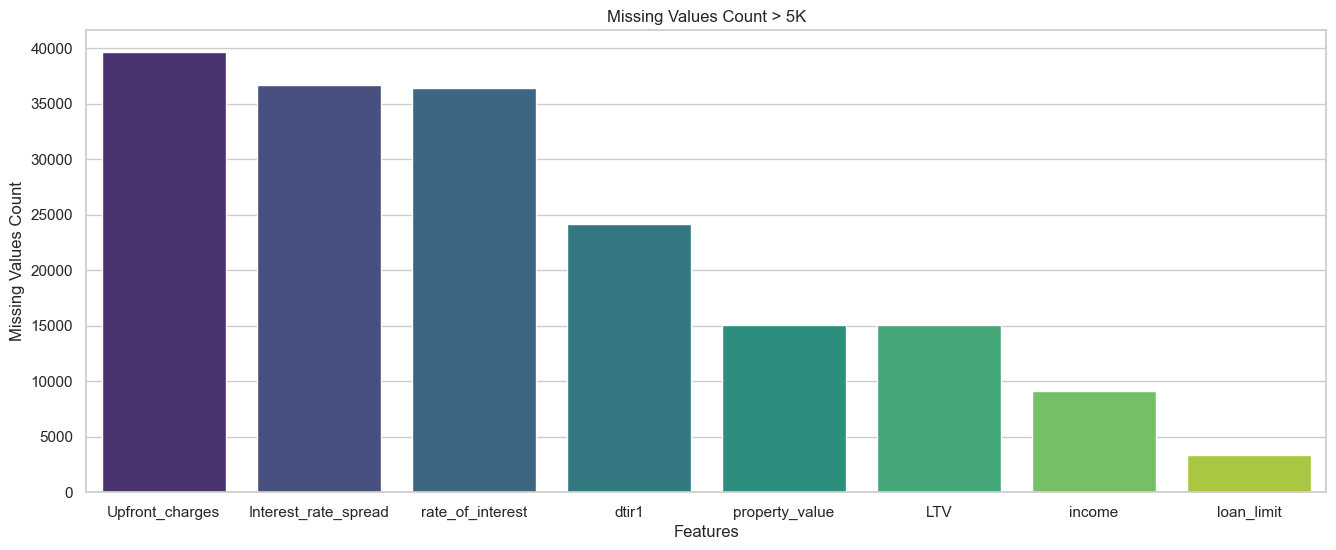

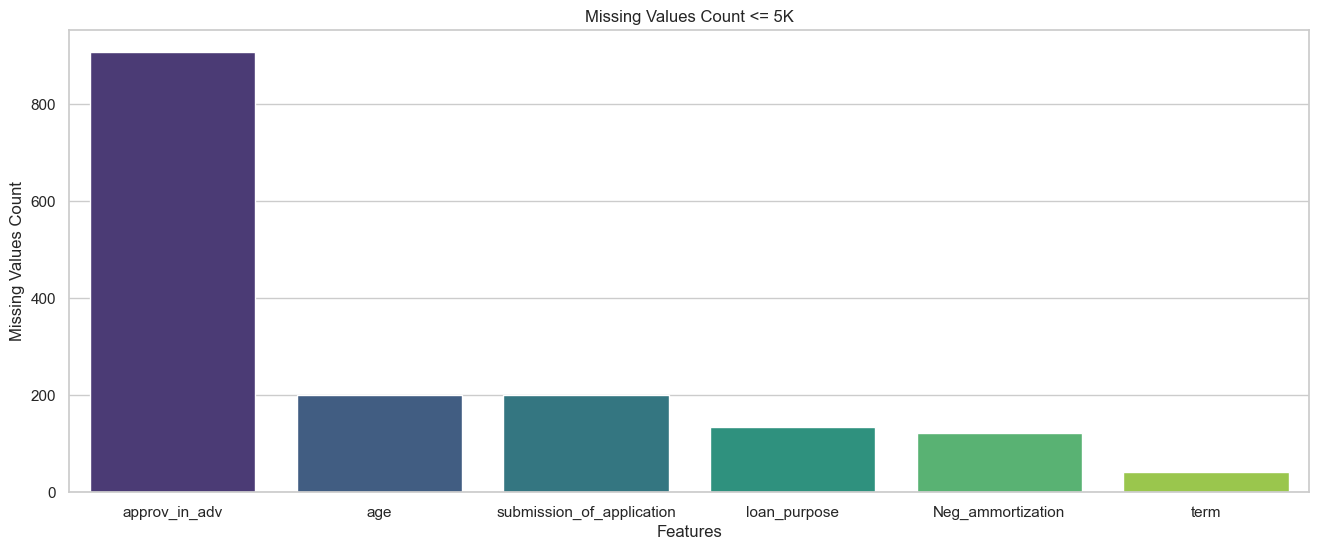

In [246]:
# Find Missing Values (Sort)
missCount = ldData.isnull().sum()[ldData.isnull().sum() > 0]
missCountGT5k = missCount[missCount > 3000].sort_values(ascending = False)
missCountLT5k = missCount[missCount <= 3000].sort_values(ascending = False)

# Create Seaborn Bar Plot GT3k
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCountGT5k.index, y = missCountGT5k.values, palette = "viridis")
plt.title('Missing Values Count > 5K')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

# Create Seaborn Bar Plot LT3k
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCountLT5k.index, y = missCountLT5k.values, palette = "viridis")
plt.title('Missing Values Count <= 5K')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [247]:
# Impute NA Values With Zero (Reasonable Assumption)
ldData['Upfront_charges'].fillna(0, inplace = True)
ldData['income'].fillna(0, inplace = True)

# Remove Interest Rate Spread, Rate Of Interest - Too Many Rows!
ldData.drop(['Interest_rate_spread', 'rate_of_interest'], axis = 1, inplace = True)

# Drop NA Values (Few Columns, Little Change In Shape)
ldData.dropna(subset = ['loan_limit', 'approv_in_adv', 'age', 'submission_of_application', 'loan_purpose', 'Neg_ammortization', 'term'], inplace = True)

# Print Shape
print(ldData.shape)

(143942, 30)


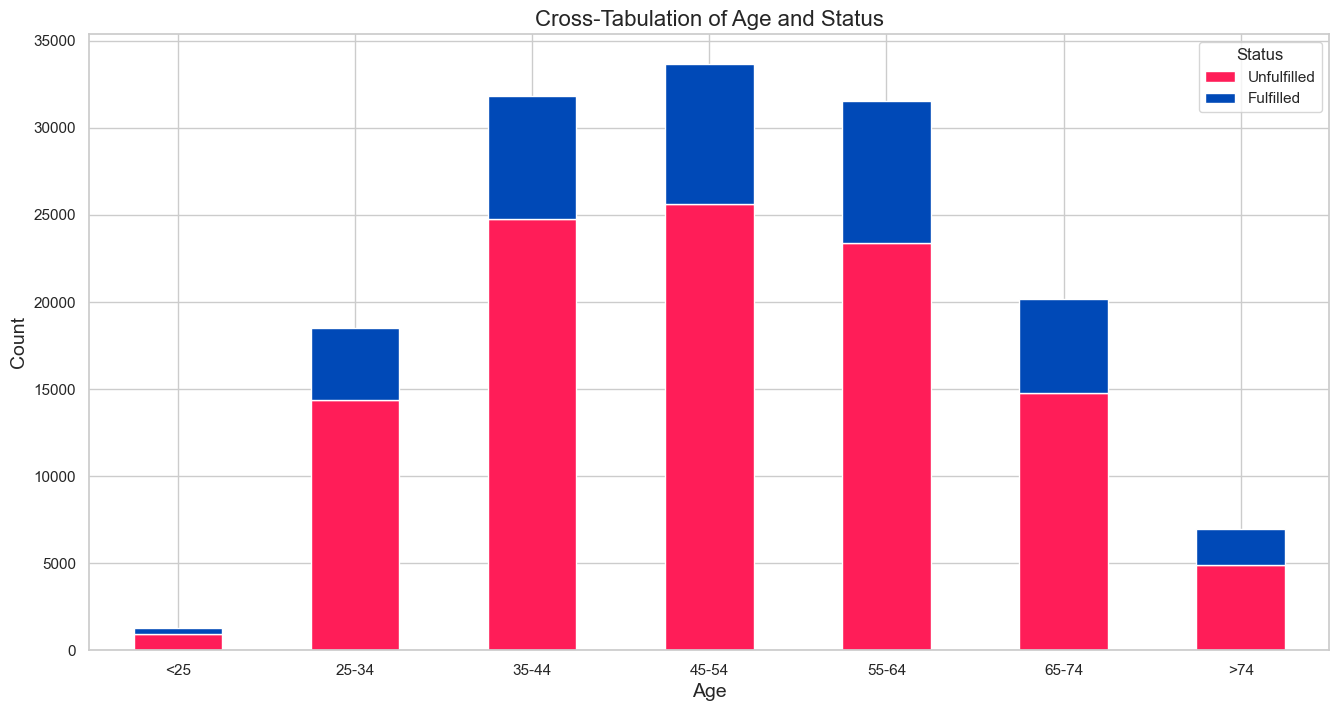

In [248]:
# Create Cross-Tabulation Of Age, Status
ldDataCrossTab = pd.crosstab(ldData['age'], ldData['Status'])

# Order By List Of Values In Age Column
ldDataCrossTab = ldDataCrossTab.reindex(sorted(ldDataCrossTab.columns), axis = 1)

# Move Unsorted Row To Top
ldDataCrossTab = ldDataCrossTab.reindex(['<25'] + list(ldDataCrossTab.index.drop('<25')), axis = 0)

# Create The Plot
ldDataCrossTab.plot(kind = 'bar', stacked = True, figsize = (16, 8), color = ['#FF1D58', '#0049B7'])

# Add Labels, Fix Rotation, Add Legend
plt.title('Cross-Tabulation of Age and Status', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 0)
plt.legend(title = 'Status', labels = ('Unfulfilled', 'Fulfilled'))

# Show Plot
plt.show()

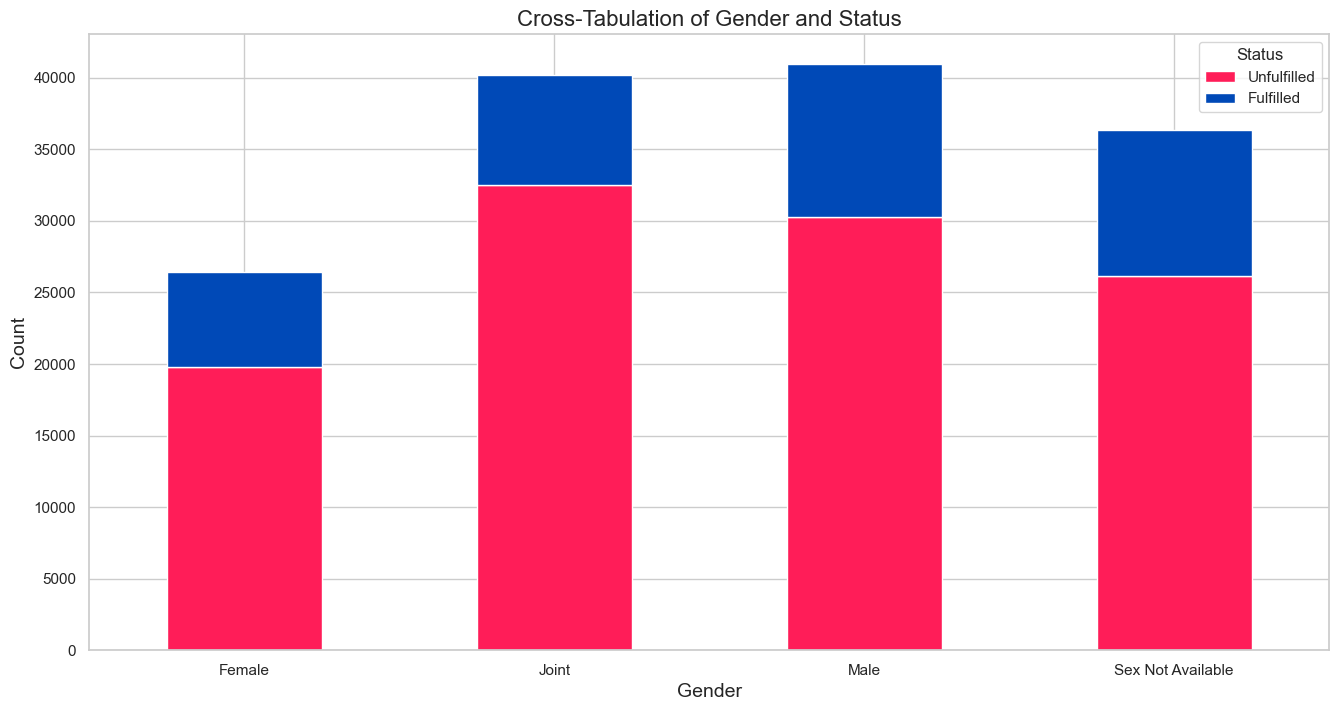

In [249]:
# Create Cross Tabulation Of Gender, Status
ldDataCrossTab = pd.crosstab(ldData['Gender'], ldData['Status'])

# Create The Plot
ldDataCrossTab.plot(kind = 'bar', stacked = True, figsize = (16, 8), color = ['#FF1D58', '#0049B7'])

# Add Labels, Fix Rotation, Add Legend
plt.title('Cross-Tabulation of Gender and Status', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 0)
plt.legend(title = 'Status', labels = ('Unfulfilled', 'Fulfilled'))

# Show Plot
plt.show()


# LTV, Property Value, Loan Amount

In [250]:
# Find Columns with Missing Remaining Values
ldData.isnull().sum()[ldData.isnull().sum() > 0].sort_values(ascending = False)

dtir1             23305
property_value    14597
LTV               14597
dtype: int64

In [251]:
# Would Be Hard To Impute Missing Values For Debt To Income Ratio
ldData.drop(['dtir1'], axis = 1, inplace = True)

In [252]:
# Replace Missing Property Value With Column Median
ldData['property_value'].fillna(ldData['property_value'].median(), inplace = True)

# Calculate Missing LTV Values From Loan Amount / Property Value (Formula)
ldData['LTV'].fillna(ldData['loan_amount'] / ldData['property_value'], inplace = True)

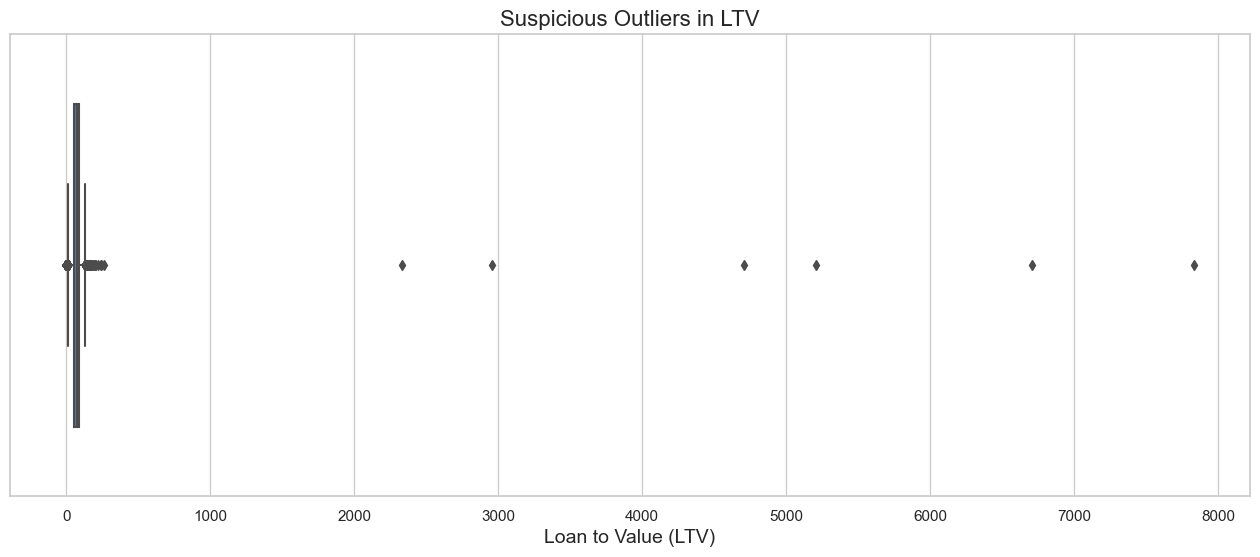

In [255]:
# Plot LTV Values
sns.set_style("whitegrid")
plt.figure(figsize = (16, 6))
sns.boxplot(x = "LTV", data = ldData, width = 0.7)
plt.title("Suspicious Outliers in LTV", fontsize = 16)
plt.xlabel("Loan to Value (LTV)", fontsize = 14)
plt.show()

In [256]:
# LTV (Loan-Value) Ratio = Percentage (Should Ideally Be In [0, 1])
# LTV = Loan Amount / Property Value
# If Loan Amount > Property Value, LTV > 1
# These Account For Suspicious Outliers (Property Value == 8000 => Most Likely Initially Missing Value)
ldData[['property_value', 'loan_amount', 'LTV']][ldData.LTV > 1000]

,property_value,loan_amount,LTV
16951,8000.0,626500,7831.25
46287,8000.0,236500,2956.25
47807,8000.0,416500,5206.25
55286,8000.0,536500,6706.25
65238,8000.0,376500,4706.25
123343,8000.0,186500,2331.25


In [257]:
# Drop Suspicious Columns Above
ldData = ldData[ldData.property_value != 8000]

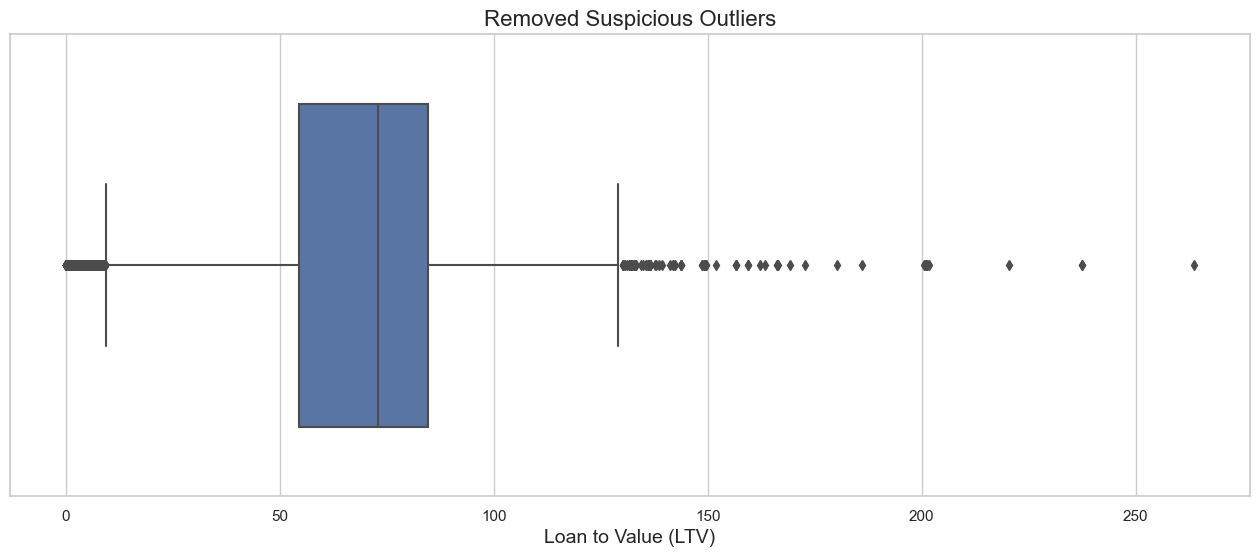

In [258]:
# Plot LTV Values
sns.set_style("whitegrid")
plt.figure(figsize = (16, 6))
sns.boxplot(x = "LTV", data = ldData, width = 0.7)
plt.title("Removed Suspicious Outliers", fontsize = 16)
plt.xlabel("Loan to Value (LTV)", fontsize = 14)
plt.show()

# Given that the probability of getting an LTV ratio more than 100% is low 
# (for non fulfilled cases), even if it represents a high-risk authorization, 
# it would be advisable for the loan lender to keep offering this kind of service

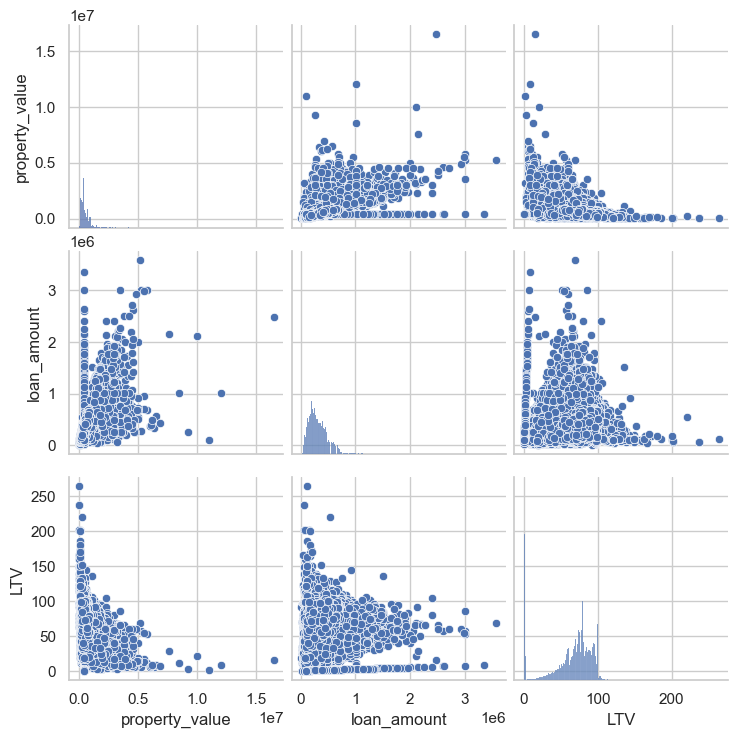

In [259]:
# Make Pairwise Plot
sns.pairplot(ldData[["property_value", "loan_amount", "LTV"]])
plt.show()

# Note Correlation Between Property Value And Loan Amount (Linear Relationship)
# Note Inverse Exponential Relationship Between LTV And Property Value (Non-Linear Relationship)

# Float Analysis, UMAP, PCA

In [187]:
from sklearn.preprocessing import StandardScaler

# Get Float Columns From Dataframe
ldDataFloat = ldData.select_dtypes(include = ['float64']).values
scaledFloatData = StandardScaler().fit_transform(ldDataFloat)

In [208]:
# 3 / 4 Loan Default
print(ldData[ldData['Status'] == 0].shape[0])
print(ldData[ldData['Status'] == 1].shape[0])

108682
35254


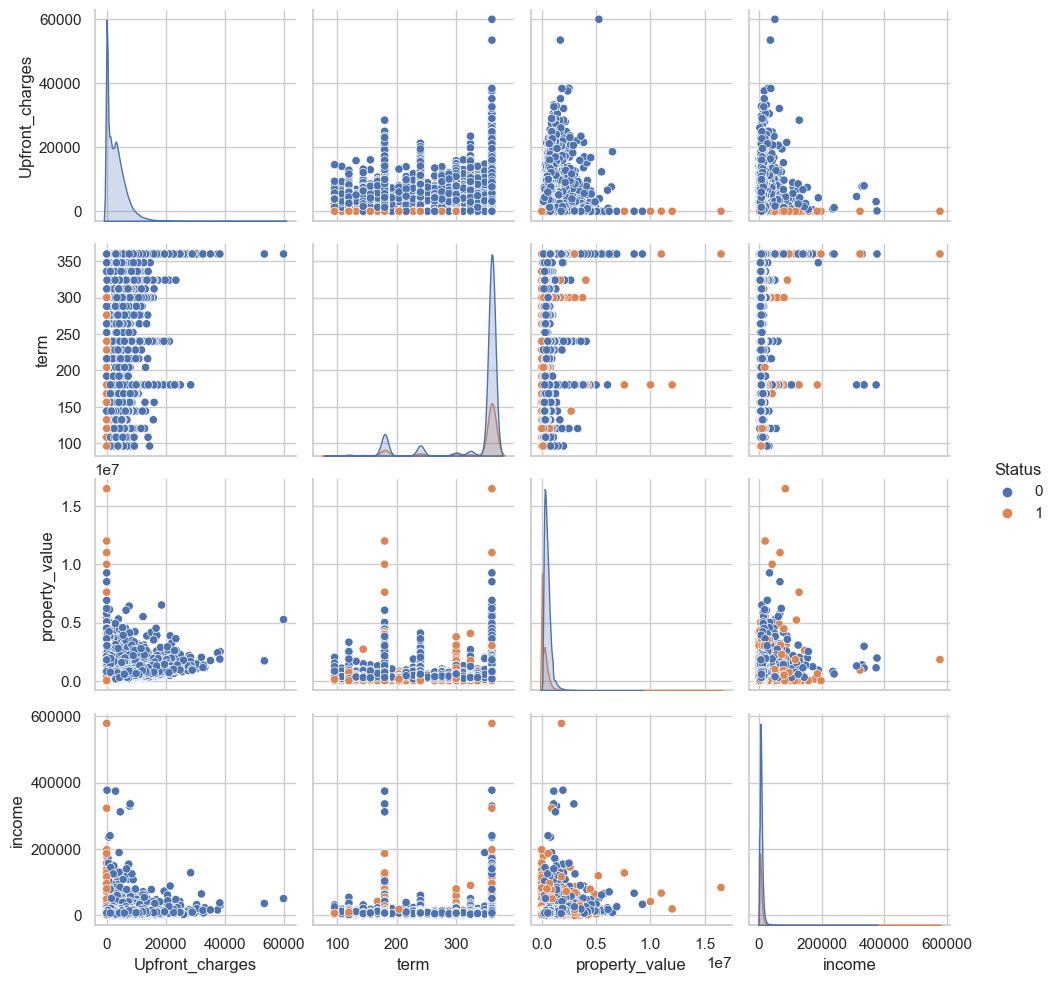

In [205]:
# Plot Float Values With Status Hue
sns.pairplot(ldData[["Upfront_charges", "term", "property_value", "income", "Status"]], hue = "Status")
plt.show()

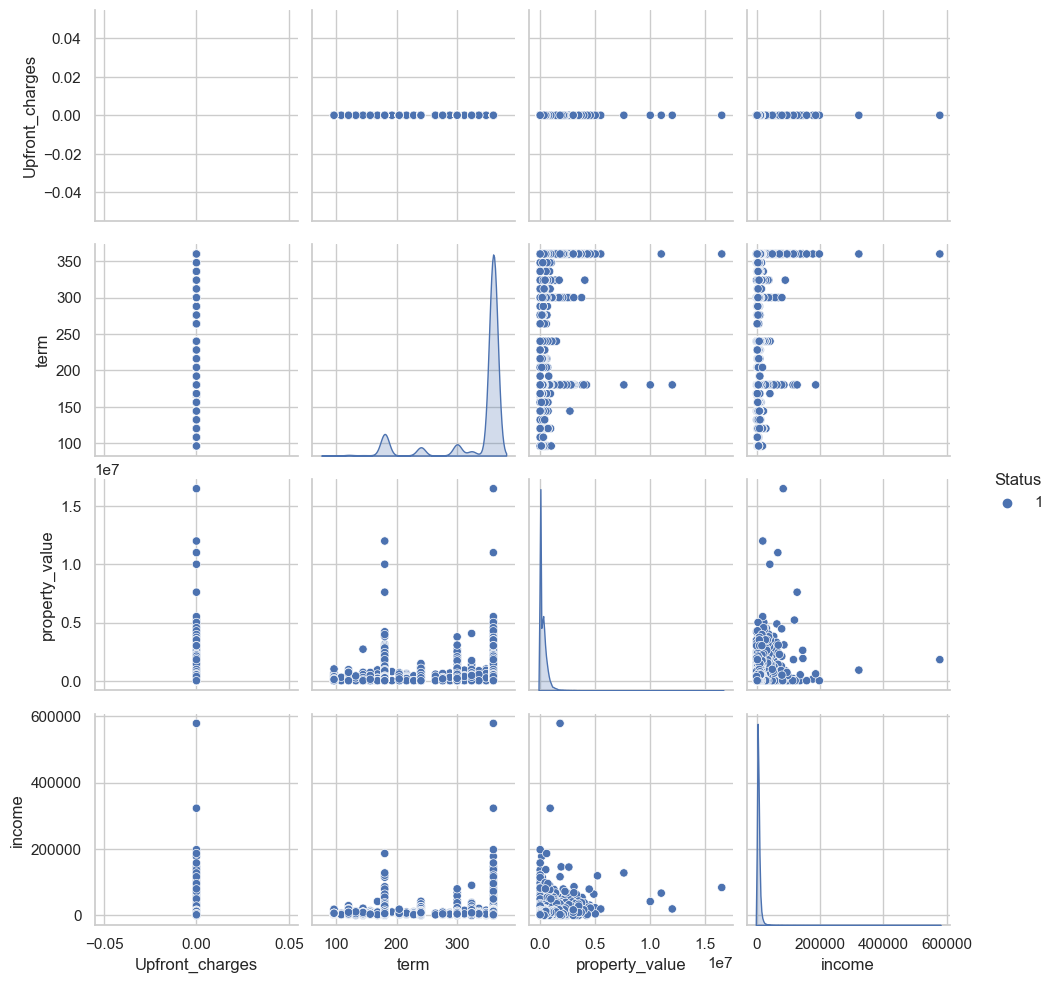

In [213]:
# Look Specifically At Loan Default Status == 1 (Defaulted)
sns.pairplot(ldData[ldData['Status'] == 1][["Upfront_charges", "term", "property_value", "income", "Status"]], hue = "Status")
plt.show()

# This Plot Shows That Whenever The Loan Defaulted, The Upfront Charges Were 0.0

# Exceptional Work

In [188]:
# Create Mapper
dataMapper = umap.UMAP().fit(scaledFloatData)

c:\Users\trevo\anaconda3\envs\classes\lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


<Axes: >

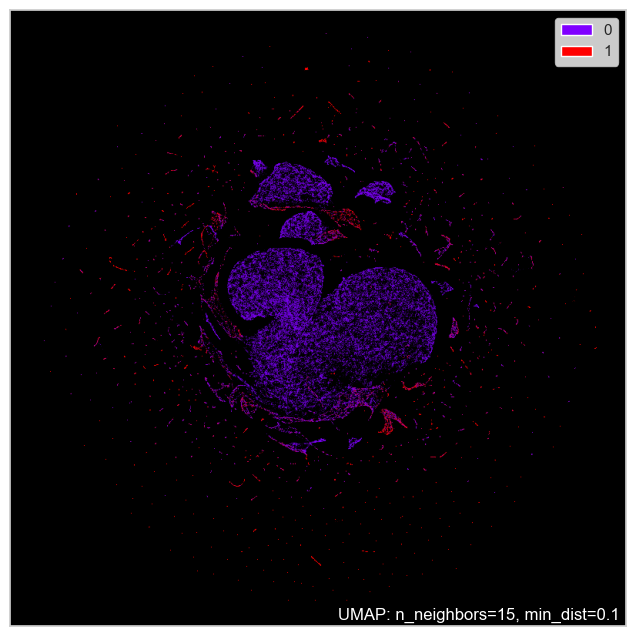

In [190]:
# Cluster Plot
umap.plot.points(dataMapper, labels = ldData['Status'], theme = 'fire')

<Axes: >

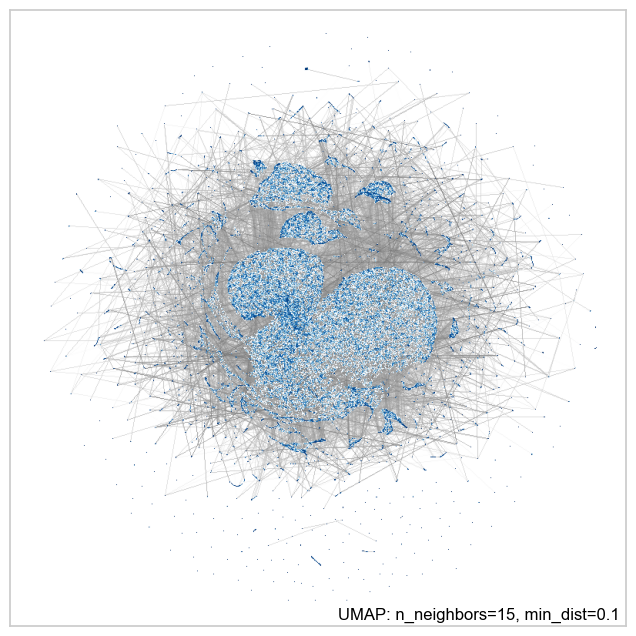

In [191]:
# UMAP Connectivity Graph
umap.plot.connectivity(dataMapper, show_points = True)

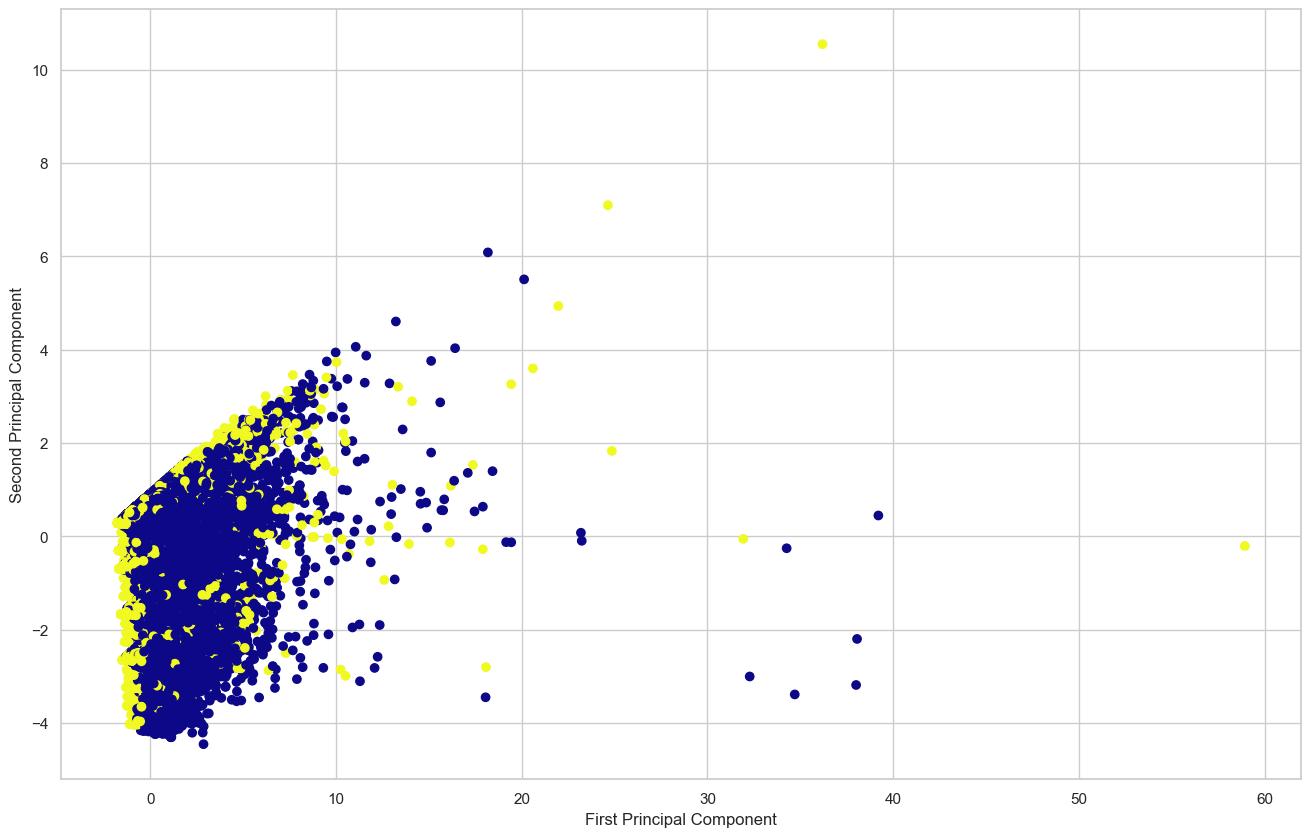

In [217]:
# Let's Check Out PCA
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components = 2)
pca.fit(scaledFloatData)
pcaData = pca.transform(scaledFloatData)

# Plot PCA Data
plt.figure(figsize = (16, 10))
plt.scatter(pcaData[:, 0], pcaData[:, 1], c = ldData['Status'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# As We Can See, PCA Is Not Good Here (But It's Fast!)

UMAP (Uniform Manifold Approximation and Projection) and PCA (Principal Component Analysis) are both dimensionality reduction techniques used to visualize multi-dimensional data in a 2D space. UMAP is a newer, non-linear method that preserves more of the global structure of the data, while PCA is a linear method that is faster and more widely used. In this section, we will compare these two methods which have already been visualized above.

UMAP, a neighbor graph method, is based on the concept of the uniform topological manifold, a space that is locally flat. It uses the Nerve Theorem to construct a fuzzy simplicial complex from the data (approximating the uniform manifold), which is then used to create a low-dimensional embedding of the data (projection). Note that, by definition of the Riemann manifold, we are able to homotopically reduce the dimension of the manifold. Algebraically, this process involves calculating edge similarities between nodes, initializing a low-dimensional graph, and optimizing a cross-entropy loss function to clearly define clusters in the low-dimensional space. The fuzzy union operation, defined as $ \alpha + \beta - \alpha \cdot \beta $, is crucial in this process.

On the other hand, PCA, a matrix factorization method, works by identifying the axes in the data that explain the most variance (Covariance matrix), and projecting the data onto these axes (Eigendecomposition). This linear method is faster than UMAP, but it may not capture non-linear relationships between the data as effectively, and thus does much worse on the task than UMAP, which we can see visually.

Comparing the two, UMAP tends to produce more defined clusters than PCA, due to its ability to capture non-linear relationships. However, PCA is significantly faster, making it a more practical choice for large datasets or quick analyses. 

References: 
- [Understanding UMAP](https://pair-code.github.io/understanding-umap/)
- [UMAP Supplement](https://pair-code.github.io/understanding-umap/supplement.html)
- [UMAP GitHub](https://github.com/lmcinnes/umap)
- [UMAP Documentation](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)
- [UMAP Paper](https://arxiv.org/pdf/1802.03426.pdf)
- [UMAP YouTube Video 1](https://www.youtube.com/watch?v=eN0wFzBA4Sc)
- [UMAP YouTube Video 2](https://www.youtube.com/watch?v=jth4kEvJ3P8&t)
- [UMAP YouTube Video 3](https://www.youtube.com/watch?v=nq6iPZVUxZU)